<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve 

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [6]:
data.query('Tenure.isna()')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


После рассмотрения данных мы видим, что в части подготовки данных нам необходимо:

1) преобразовать названия столбцов чтобы было удобнее работать

2) избавится от столбцов с фамилией, индексом строки и уникальным идентификатором, поскольку эти данные не несут смысловой нагрузки для обучения модели.

3) преобразовать оставшиеся данные типа object, чтобы не попасть в дамми ловушку.

4) избавиться от пропусков в столбце tenure. Поскольку закономерности у пропущенных значений не прослеживаются, для этого я вижу 3 варианта: а) заполнить их случайными значениями от 0 до 10, б) заполнить их с помощью машинного обучения в) убрать их из данных. И как мне кажется самым верным путем будет решить задачу с помощью машинного обучения. Если мы уберем данные совсем, то модель получит для обучения меньше данных и это может оказать большее влияние на точность модели.

In [7]:
data.set_axis(['row_number','customer_id','surname', 'credit_score', 'geography', 'gender', 'age',
               'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member',
               'estimated_salary', 'exited'], axis = 'columns', inplace = True)
data.head(3)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


In [8]:
data = data.drop(['row_number', 'customer_id', 'surname'], axis = 1)

In [9]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head(3)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


Теперь разделим таблицу на таблицу с пропусками (которую мы будем предсказывать) и на таблицу без пропусков в столбце tenure которую мы разделим на тренировочную и валидационную выборки. Можно конечно еще разделить на тестовую, но предположительно данный столбец не несет такой важности чтобы делать на него упор, кроме того у нас не такая большая выборка, и таким образом мы увеличим объем данных для обучения модели.

In [10]:
data_tenure_bad = data_ohe.query('tenure.isna()')
data_tenure_good = data_ohe.query('tenure.notna()')

In [11]:
features_tenure = data_tenure_good.drop('tenure', axis = 1)
target_tenure = data_tenure_good['tenure']
features_train_tenure, features_valid_tenure, target_train_tenure, target_valid_tenure = train_test_split(features_tenure, 
                                       target_tenure, test_size = 0.25, random_state=12345, stratify = target_tenure)
features_predict_tenure = data_tenure_bad.drop('tenure', axis = 1)

In [12]:
best_model_tenure = None
best_accuracy_tenure = 0
best_est_tenure = 0
best_depth_tenure = 0
for est_tenure in range(10, 51, 10):
    for depth_tenure in range (1, 11):
        model_tenure = RandomForestClassifier(random_state = 12345, n_estimators = est_tenure, max_depth = depth_tenure)
        model_tenure.fit(features_train_tenure, target_train_tenure) 
        answer_tenure = model_tenure.predict(features_valid_tenure)
        accuracy_tenure = accuracy_score(target_valid_tenure, answer_tenure)
        if best_accuracy_tenure < accuracy_tenure:
            best_model_tenure = model_tenure
            best_accuracy_tenure = accuracy_tenure
            best_est_tenure = est_tenure
            best_depth_tenure = depth_tenure
print("Высшая точность:", best_accuracy_tenure, "Количество деревьев:", best_est_tenure, "Максимальная глубина:", depth_tenure)

Высшая точность: 0.11834579850417949 Количество деревьев: 40 Максимальная глубина: 10


Точность не то чтобы высокая, но на 1,5% адекватнее, чем если бы мы проставили все пропущенные значения как самое популярное. Поскольку лучше вариантов нет - так и сделаем.

In [13]:
model_tenure_end = RandomForestClassifier(random_state = 12345, n_estimators = 40, max_depth = 10)
model_tenure_end.fit(features_tenure, target_tenure)
features_predict_tenure['tenures'] = model_tenure_end.predict(features_predict_tenure)
features_predict_tenure.head(5)

,credit_score,age,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male,tenures
30,591,39,0.00,3,1,0,140469.38,1,0,1,0,3.0
48,550,38,103391.38,1,0,1,90878.13,0,1,0,1,1.0
51,585,36,146050.97,2,0,0,86424.57,0,1,0,1,8.0
53,655,41,125561.97,1,0,0,164040.94,1,1,0,1,1.0
60,742,35,136857.00,1,0,0,84509.57,0,1,0,1,8.0


In [14]:
data_tenure_good['tenures'] = data_tenure_good['tenure']
data_tenure = data_tenure_good.drop('tenure', axis = 1)
data_tenure.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,credit_score,age,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male,tenures
0,619,42,0.00,1,1,1,101348.88,1,0,0,0,2.0
1,608,41,83807.86,1,0,1,112542.58,0,0,1,0,1.0
2,502,42,159660.80,3,1,0,113931.57,1,0,0,0,8.0
3,699,39,0.00,2,0,0,93826.63,0,0,0,0,1.0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,0,2.0


In [15]:
df = pd.concat([data_tenure] + [features_predict_tenure])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
credit_score         10000 non-null int64
age                  10000 non-null int64
balance              10000 non-null float64
num_of_products      10000 non-null int64
has_cr_card          10000 non-null int64
is_active_member     10000 non-null int64
estimated_salary     10000 non-null float64
exited               10000 non-null int64
geography_Germany    10000 non-null uint8
geography_Spain      10000 non-null uint8
gender_Male          10000 non-null uint8
tenures              10000 non-null float64
dtypes: float64(3), int64(6), uint8(3)
memory usage: 810.5 KB


### Вывод

Данные подготовлены к исследованию.

## Исследование задачи

Проверим как обучится модель, на данных которые у нас есть. Поскольку мы уже неоднократно убедились, что решающий лес самый точный метод, из известных нам на данный момент, сразу используем его.

In [16]:
features = df.drop('exited', axis = 1)
target = df['exited']
features_train_valid, features_test, target_train_valid, target_test = train_test_split(features, target, 
                                                                        test_size = 0.2, random_state=12345, stratify = target)

In [17]:
features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, 
                                       target_train_valid, test_size = 0.25, random_state=12345, stratify = target_train_valid)

In [18]:
best_model = None
best_f1 = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_train, target_train) 
        answer = model.predict(features_valid)
        f1 = f1_score(target_valid, answer)
        if best_f1 < f1:
            best_model = model
            best_f1 = f1
            best_est = est
            best_depth = depth
print("Высшая f1:", best_f1, "Количество деревьев:", best_est, "Максимальная глубина:", depth)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

Высшая f1: 0.5847589424572317 Количество деревьев: 30 Максимальная глубина: 10


In [19]:
df['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

### Вывод:

Мы определили гиперпараметры для нашей модели, результат близок к тому что нужно, но все еще недостаточно, значит попробуем увеличить точность за счет снижения дисбаланса между кол-вом единиц и нолей в столбце exited - их соотношение приблизительно 1:4.

## Борьба с дисбалансом

Я знаю три способа сбалансировать классификацию, чтобы модель смогла обучиться точнее: 1) использовать class_weight чтобы сбалансировать вес класса, 2) увеличить выборку (в данном случае положительную), 3) уменьшить выборку (в данном случае отрицательную). И для проверки какой из способов будет лучше, кроме метрики f1, у нас есть ROC кривая и метод оценки качества auc_roc считающий площадь под ROC кривой. 

Как мне кажется уменьшение выборки нам точно не поможет, поскольку чем больше данных и эти данные разнообразнее то тем лучше должна обучиться модель.

In [20]:
# вес класса
model_1 = RandomForestClassifier(random_state = 12345, n_estimators = 30, max_depth = 10, class_weight = 'balanced')
model_1.fit(features_train, target_train) 
predicted_1 = model.predict(features_valid)
f1_score(target_valid, predicted_1)

0.5843750000000001

Пока выглядит неутешительно. Попробуем изменить выборку.

Поскольку при увеличении и уменьшении выборка меняется, подберем гиперпараметры для новых выборок отдельно.

In [21]:
# увеличение выборки
features_train_zero = features_train[target_train == 0]
features_train_one = features_train[target_train == 1]
target_train_zero = target_train[target_train == 0]
target_train_one = target_train[target_train == 1]

features_upsampled = pd.concat([features_train_zero] + [features_train_one] * 3)
target_upsampled = pd.concat([target_train_zero] + [target_train_one] * 3)

features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

In [22]:
best_model_2_choose = None
best_f1_2_choose = 0
best_est_2_choose = 0
best_depth_2_choose = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_2_choose = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model_2_choose.fit(features_upsampled, target_upsampled) 
        predicted_2_choose = model_2_choose.predict(features_valid)
        f1_2 = f1_score(target_valid, predicted_2_choose)
        if best_f1_2_choose < f1_2:
            best_model_2_choose = model_2_choose
            best_f1_2_choose = f1_2
            best_est_2_choose = est
            best_depth_2_choose = depth
print("Высшая f1:", best_f1_2_choose, "Количество деревьев:", best_est_2_choose, "Максимальная глубина:", best_depth_2_choose)

Высшая f1: 0.6279329608938548 Количество деревьев: 20 Максимальная глубина: 7


In [23]:
model_2 = RandomForestClassifier(random_state = 12345, n_estimators = 20, max_depth = 7)
model_2.fit(features_upsampled, target_upsampled) 
predicted_2 = model_2.predict(features_valid)
f1_score(target_valid, predicted_2)

0.6279329608938548

Увеличение выборки принесло свои плоды.

In [24]:
# уменьшение выборки
features_downsampled = pd.concat([features_train_zero.sample(frac=0.25, random_state=12345)] + [features_train_one])
target_downsampled = pd.concat([target_train_zero.sample(frac=0.25, random_state=12345)] + [target_train_one])

features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

In [25]:
best_model_3_choose = None
best_f1_3_choose = 0
best_est_3_choose = 0
best_depth_3_choose = 0
for est in range(10, 101, 10):
    for depth in range (1, 13):
        model_3_choose = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model_3_choose.fit(features_downsampled, target_downsampled) 
        predicted_3_choose = model_3_choose.predict(features_valid)
        f1_3 = f1_score(target_valid, predicted_3_choose)
        if best_f1_3_choose < f1_3:
            best_model_3_choose = model_3_choose
            best_f1_3_choose = f1_3
            best_est_3_choose = est
            best_depth_3_choose = depth
print("Высшая f1:", best_f1_3_choose, "Количество деревьев:", best_est_3_choose, "Максимальная глубина:", best_depth_3_choose)

Высшая f1: 0.5975024015369836 Количество деревьев: 50 Максимальная глубина: 10


In [26]:
model_3 = RandomForestClassifier(random_state = 12345, n_estimators = 50, max_depth = 10)
model_3.fit(features_downsampled, target_downsampled) 
predicted_3 = model_3.predict(features_valid)
f1_score(target_valid, predicted_3)

0.5975024015369836

Уменьшение выборки тоже помогло, но от метода увеличения выборки все таки ощутимо отстает.

Также попробуем обучить модель логистической регрессии с этими же способами борьбы с дисбалансом и посмотрим верна ли моя гипотеза что решающий лес лучше справляется с решением таких задач.

In [27]:
# вес класса
model_1_log_reg = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight = 'balanced')
model_1_log_reg.fit(features_train, target_train)
predicted_1_log_reg = model_1_log_reg.predict(features_valid)
f1_score(target_valid, predicted_1_log_reg)

0.4716821639898563

In [28]:
# увеличение выборки
model_2_log_reg = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_2_log_reg.fit(features_upsampled, target_upsampled)
predicted_2_log_reg = model_2_log_reg.predict(features_valid)
f1_score(target_valid, predicted_2_log_reg)

0.4553014553014553

In [29]:
# уменьшение выборки
model_3_log_reg = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_3_log_reg.fit(features_downsampled, target_downsampled)
predicted_3_log_reg = model_3_log_reg.predict(features_valid)
f1_score(target_valid, predicted_3_log_reg)

0.4437246963562753

Результаты логистической регрессии весьма удручающие, зато мы видим что в отличии от решающего леса, балансировка веса класса дает положительный эффект для модели логистической регрессии.

Давайте проверим качество моделей с помощью auc_roc

In [30]:
probabilities_valid_1 = model_1.predict_proba(features_valid)
probabilities_one_valid_1 = probabilities_valid_1[:, 1]
roc_auc_score(target_valid, probabilities_one_valid_1)

0.8594141136514019

In [31]:
probabilities_valid_2 = model_2.predict_proba(features_valid)
probabilities_one_valid_2 = probabilities_valid_2[:, 1]
roc_auc_score(target_valid, probabilities_one_valid_2)

0.8637867451426774

In [32]:
probabilities_valid_3 = model_3.predict_proba(features_valid)
probabilities_one_valid_3 = probabilities_valid_3[:, 1]
roc_auc_score(target_valid, probabilities_one_valid_3)

0.8561288561288561

In [33]:
probabilities_valid_3 = model_1_log_reg.predict_proba(features_valid)
probabilities_one_valid_3 = probabilities_valid_3[:, 1]
roc_auc_score(target_valid, probabilities_one_valid_3)

0.7598075733668953

In [34]:
probabilities_valid_3 = model_2_log_reg.predict_proba(features_valid)
probabilities_one_valid_3 = probabilities_valid_3[:, 1]
roc_auc_score(target_valid, probabilities_one_valid_3)

0.7157188004645632

In [35]:
probabilities_valid_3 = model_3_log_reg.predict_proba(features_valid)
probabilities_one_valid_3 = probabilities_valid_3[:, 1]
roc_auc_score(target_valid, probabilities_one_valid_3)

0.7190194817313462

### Вывод:

По итогу мы видим что из трех вариантов устранения дисбалансов эффективнее всего отработали модель решающего леса и метод увеличения выборки, это подтверждает и метрика f1 и метрика auc_roc. Мы достигли необходимую точность на валидационной выборке, пора проверить что получится на тестовой.

## Тестирование модели

In [36]:
predicted_test = model_2.predict(features_test)
f1_score(target_test, predicted_test)

0.5944700460829493

Как мы видим нужный уровень качества модели мы получили, давайте проверим станет ли он выше если мы обучим модель с этими же параметрами объединив тренировочную и валидационные выборки.

In [37]:
features_train_valid_zero = features_train_valid[target_train_valid == 0]
features_train_valid_one = features_train_valid[target_train_valid == 1]
target_train_valid_zero = target_train_valid[target_train_valid == 0]
target_train_valid_one = target_train_valid[target_train_valid == 1]

features_upsampled_final = pd.concat([features_train_valid_zero] + [features_train_valid_one] * 3)
target_upsampled_final = pd.concat([target_train_valid_zero] + [target_train_valid_one] * 3)

features_upsampled_final, target_upsampled_final = shuffle(features_upsampled_final, target_upsampled_final, random_state=12345)

model_final = RandomForestClassifier(random_state = 12345, n_estimators = 30, max_depth = 10)
model_final.fit(features_upsampled_final, target_upsampled_final) 
predicted_final = model_final.predict(features_test)
f1_score(target_test, predicted_final)

0.6069295101553166

Одна сотая, а все равно приятно.

И в финале посмотрим на roc-кривую и метрику auc-roc.

In [38]:
probabilities_valid_final = model_final.predict_proba(features_test)
probabilities_one_valid_final = probabilities_valid_final[:, 1]
roc_auc_score(target_test, probabilities_one_valid_final)

0.8421981303337235

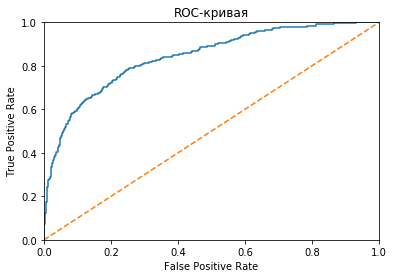

In [39]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid_final)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

### Вывод:

Мы получили необходимое значение f1 метрики, и с помощью увеличения выборки даже немного его улучшили. Однако итоговая метрика auc_roc при этом стала немного хуже. Вопрос какая из метрик в данном случае важнее для оценки модели, полагаю философский и оба варианта имеют место быть. 

## Вывод:



Мы исследовали данные банка и построили предсказательную модель, подобрали оптимальные гиперпараметры. Далее для повышения точности модели мы поработали с балансом в данных, и благодаря оценке качества модели метрикой auc_roc, решили что в данном случае будет оптимален метод увеличения выборки. Провели тест модели, получили удовлетворительные результаты, и улучшили их еще немного с помощью увеличения тренировочной выборки за счет валидационной.